In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter

import astropy.units as u
from astropy.coordinates import EarthLocation, solar_system_ephemeris
from astropy.time import Time

from sunpy.coordinates import sun



ModuleNotFoundError: No module named 'sunpy'

In [28]:
from astropy.utils.data import clear_download_cache
clear_download_cache()

In [29]:
longitude = 80.5945
latitude = 40.7461
time_day = '2020-06-21 00:00'


location = EarthLocation.from_geodetic(longitude * u.deg, latitude * u.deg)
time_start = Time(time_day)

Eclipse detected:
  Partial solar eclipse starts at 2020-06-21 13:17:00.000 UTC
  Partial solar eclipse ends at 2020-06-21 16:17:00.000 UTC


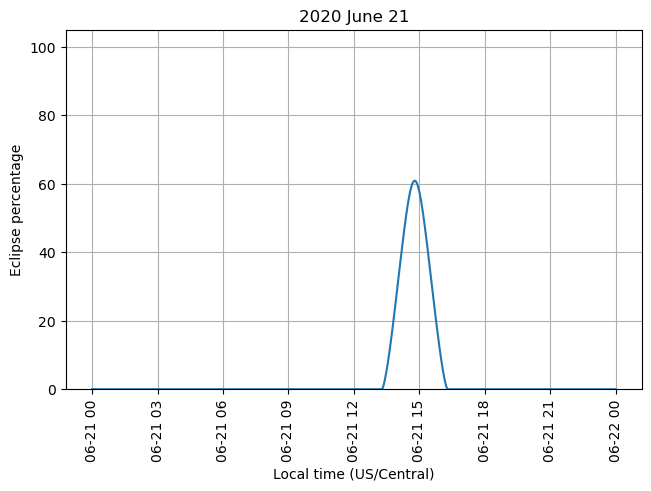

In [30]:
times_bj = time_start + np.arange(0, 60 * 24) * u.min
times_utc = times_bj - 8 * u.hour
# 粗略时间网格 后续根据算出的时间调整细节网格
# 
# Create an observer coordinate for the time array
observer = location.get_itrs(times_utc)

# Calculate the eclipse amounts using a JPL ephemeris
with solar_system_ephemeris.set('D:\DS\solar eclipse\de422.bsp'):
    amount = sun.eclipse_amount(observer)
    amount_minimum = sun.eclipse_amount(observer, moon_radius='minimum')

# Calculate the start/end points of partial偏食/total全食 solar eclipse
partial = np.flatnonzero(amount > 0)
if len(partial) > 0:
    print("Eclipse detected:")
    start_partial, end_partial = times_bj[partial[[0, -1]]]
    print(f"  Partial solar eclipse starts at {start_partial} UTC")

    total = np.flatnonzero(amount_minimum == 1)
    if len(total) > 0:
        start_total, end_total = times_bj[total[[0, -1]]]
        print(f"  Total solar eclipse starts at {start_total} UTC\n"
              f"  Total solar eclipse ends at {end_total} UTC")
    print(f"  Partial solar eclipse ends at {end_partial} UTC")
    
elif len(partial) == 0 :
    print(f"  No solar eclipse at {time_day} in Lon: {longitude}, Lat:{latitude}\n")
    

# Plot the eclipse timeseries
if len(partial) > 0 :   
    fig = plt.figure(layout="constrained")
    ax = fig.add_subplot()

    ax.plot(times_bj.datetime64, amount)

    ax.set_ylim(0, 105)

    ax.tick_params('x', rotation=90)

    ax.set_title(f"{time_start.strftime('%Y %B %d')}")
    ax.set_ylabel("Eclipse percentage")
    ax.set_xlabel("Local time (US/Central)")
    ax.grid()



In [24]:
np.array(amount)


array([0., 0., 0., ..., 0., 0., 0.])

<Time object: scale='utc' format='iso' value=2020-01-01 00:00:00.000>